In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
def entropy_loss(Y, Y_pred, epsilon=1e-15):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
    loss = -(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    return np.mean(loss)

In [74]:
class LogisticRegressionGradientDescent:
    def __init__(self, alpha, epoches, noIndepentvars):
        self.alpha = alpha
        self.epoches = epoches
        self.noIndepentvars = noIndepentvars
        self.coefficients = np.random.random(self.noIndepentvars+1) # constant, x1,x2,.. coefficients
    
    def fit(self, X, Y):
        X, Y = np.array(X), np.array(Y)
        errors = []
        for iter in range(self.epoches):
            for x,y in zip(X, Y):
                deriv = self.cross_entropy_der(x, y)
                self.coefficients -= self.alpha * deriv
            Y_pred = self.predict(X)
            errors.append([iter+1, entropy_loss(Y, Y_pred)])
        return errors
    
    def cross_entropy_der(self, x, y):
        x = np.insert(x, 0, 1)
        y_pred = self.predict(x[1:])
        return (y_pred - y) * x

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = np.insert(X, 0, 1)
            z = np.dot(self.coefficients, X)
            return LogisticRegressionGradientDescent.sigmoid(z)
        else:
            intercept = np.ones((X.shape[0], 1))
            X_new = np.hstack((intercept, X))
            z = np.dot(X_new, self.coefficients)
            return LogisticRegressionGradientDescent.sigmoid(z)

In [75]:
df = pd.read_csv('datasets/q1_data.csv')

In [76]:
X, Y = np.array(df['experience']), df['salary'].values

In [77]:
mini, maxi = Y.min(), Y.max()
Y = np.array((Y-mini)/(maxi - mini) >0.5, dtype=np.uint8)

In [78]:
model = LogisticRegressionGradientDescent(0.025, 5000, 1)
errors = model.fit(X.reshape(-1,1), Y)

pred = model.predict(X.reshape(-1,1))

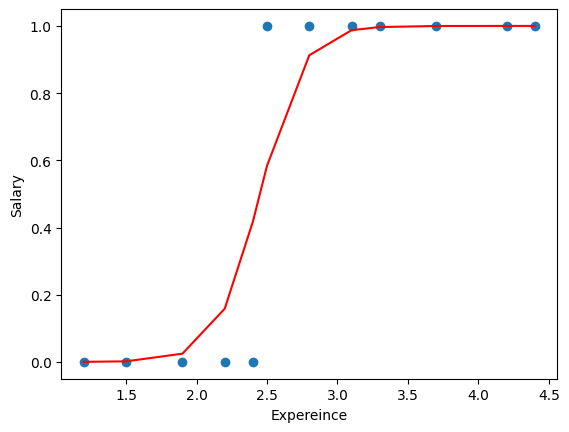

In [79]:
plt.scatter(X, Y)
plt.plot(X, pred, c='red')
plt.xlabel('Expereince')
plt.ylabel('Salary')
plt.show()

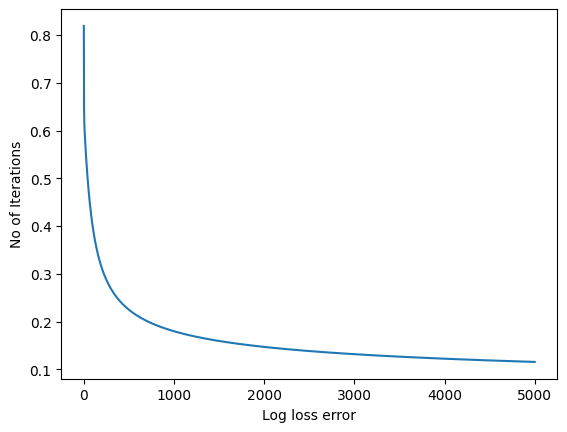

In [80]:
x = [item[0] for item in errors]
y = [item[1] for item in errors]
plt.plot(x, y)
plt.xlabel('Log loss error')
plt.ylabel('No of Iterations')

plt.show()